# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# X, y = mnist['data'], mnist['target']

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, roc_auc_score

## NOTICE: IT IS REALLY NECESSARY TO INCLUDE SOME KIND OF REFERAL OR DESCRIPTION OF THE DATABASES WE ARE USING, THE LABS ARE ALREADY VERY DENSE AND DIFFICULT TO DO TO ON TOP ON THAT THROW US ON THE BLIND
## TO WORK WITH A DATABASE WE HAVE NOT A CLUE WHAT IT IS ABOUT. IT TOOK ME LIKE 40 MIN JUST TO UNDERSTAND WHAT THE DATABASE IS ABOUT AND THEN BE ABLE TO DO THE EXERCISES SINCE I NOW UNDERSTAND WHAT
## IM BEING ASKED TO DO. AND IT IS NOT OBVIOUS THAT THE DESCRIPTION IS ON THE DOWNLOADED VARIABLE.

## NOTICE 2: ALSO THE LAB IS OUTDATED, THE MOMENT I RUN THE FIRST LINE IM GETTING AN ERROR. fetch_mldata IS NOT USED ANYMORE AND MUST BE REPLACED BY ANOTHER PACKAGE. THIS ISSUE IS WELL KNOWN FOR A YEAR
## AND I WOULD EXPECT TO NOT ENCOUNTER IT IN A LAB.

#Paolo: points taken Victor

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [3]:
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [11]:
X[36000]
#Paolo:yes

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

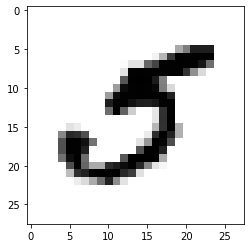

In [12]:
plt.imshow(X[36000].reshape(28,28), cmap = plt.cm.binary, interpolation="nearest")
#Paolo:yes

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [13]:
y[36000]

5

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [5]:
X_train = X[:60000]
X_test = X[-10000:]
y_train = y[:60000]
y_test = y[-10000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [6]:
y_5 = np.where(y != 5, 0, y)
y_5 = np.where(y_5 == 5, 1, y_5)

y_5_train = y_5[:60000]
y_5_test = y_5[-10000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [23]:
model_5 = LogisticRegression()
# model_5.max_iter = 10000
model_5.fit(X_train, y_5_train)

y_pred = model_5.predict(X)
#Paolo: here you could predict on X_train
model_5.score(X_test,y_5_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9779

### Does the classifier predict correctly the 36000th digit we picked before?

In [21]:
pd.DataFrame({'pred': y_pred, 'val': y_5}).loc[36000]
#YES

pred    1
val     1
Name: 36000, dtype: int8

In [11]:
tn, fp, fn, tp = confusion_matrix(y_pred, y_5).ravel()
tn, fp, fn, tp

(54153, 905, 426, 4516)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [24]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [25]:
never_5_clf.fit(X_train, y_5_train)
y_predict_dumb = never_5_clf.predict(X)
tn, fp, fn, tp = confusion_matrix(y_predict_dumb, y_5).ravel()
tn, fp, fn, tp

(63687, 6313, 0, 0)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [26]:
print(classification_report(y_pred, y_5))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     64239
           1       0.83      0.91      0.87      5761

    accuracy                           0.98     70000
   macro avg       0.91      0.95      0.93     70000
weighted avg       0.98      0.98      0.98     70000



In [27]:
print(classification_report(y_predict_dumb, y_5))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     70000
           1       0.00      0.00      0.00         0

    accuracy                           0.91     70000
   macro avg       0.50      0.45      0.48     70000
weighted avg       1.00      0.91      0.95     70000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [28]:
# From a first glance we see that for value 0 (not a number 5) they both work pretty well, but the first one is slighty better. On the second value (1 for number 5) the first model still has a high
# value but slower than for 0, while the second model its completely disastrous.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

ValueError: Never5Classifier should be a binary classifer

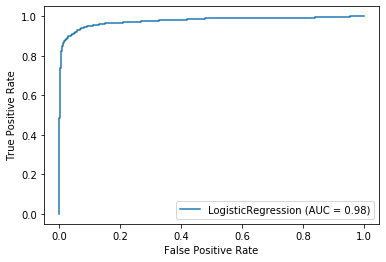

In [30]:
plot_roc_curve(model_5, X_test, y_5_test) 
plot_roc_curve(never_5_clf, X_test, y_5_test) 
plt.show()
# This gives me an error saying that Never5Classifier is not a binary classifier

### Now find the roc_auc_score for each. 

In [31]:
roc_auc_score(y_5, y_predict_dumb)

0.5

In [32]:
roc_auc_score(y_5, y_pred)

0.9127544190476278

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# The non dumb model works much better. This metric tells us the area under the curve of our model, which translates to the prediction capacity, the higher the area under the curve, the higher
# the probability of predicting 1 as 1 and 0 as 0
#paolo: great lab!